In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf


In [3]:
data = pd.read_csv("sunspots.csv")

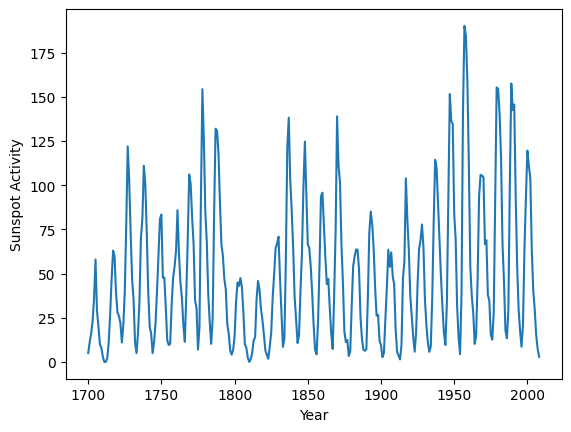

In [4]:
plt.plot(data["YEAR"], data["SUNACTIVITY"])
plt.xlabel("Year")
plt.ylabel("Sunspot Activity")
plt.show()

Dickey-Fuller Test:
ADF Statistic: -2.8377807249381943
p-value: 0.053076421728120673
The time series is not stationary (p-value > 0.05)
Dickey-Fuller Test:
ADF Statistic: -14.861663428129381
p-value: 1.715552423167157e-27
The time series is stationary (p-value <= 0.05)


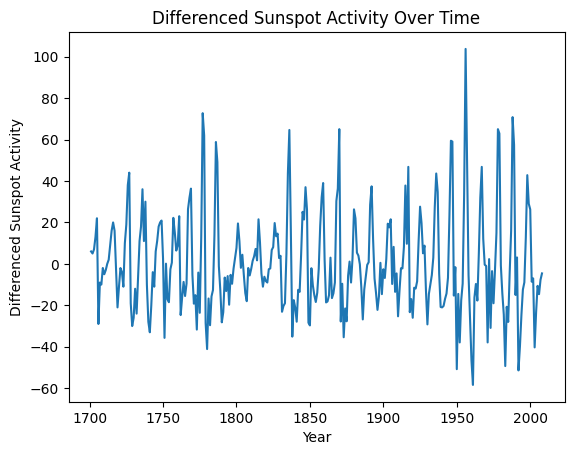

In [10]:
def check_stationarity(data):
    # Perform Dickey-Fuller test
    result = adfuller(data)
    p_value = result[1]

    # Print the results
    print("Dickey-Fuller Test:")
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {p_value}')

    if p_value <= 0.05:
        print("The time series is stationary (p-value <= 0.05)")
    else:
        print("The time series is not stationary (p-value > 0.05)")

# Check stationarity of the original data
check_stationarity(data["SUNACTIVITY"])
differenced_data = data["SUNACTIVITY"].diff(periods=1).dropna()

    # Check stationarity of the differenced data
check_stationarity(differenced_data)

    # Visualize the differenced data
plt.plot(data["YEAR"][1:], differenced_data)
plt.xlabel("Year")
plt.ylabel("Differenced Sunspot Activity")
plt.title("Differenced Sunspot Activity Over Time")
plt.show()


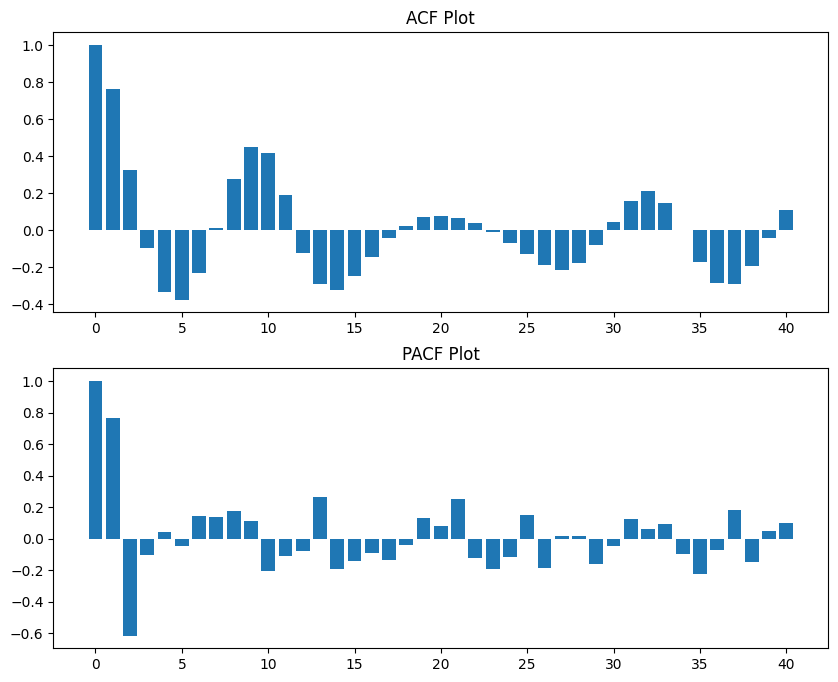

In [16]:
seasonal_differenced_data = data["SUNACTIVITY"].diff(12).dropna()

# Plot ACF and PACF for the seasonally differenced series
def plot_acf_pacf(data, lags=40):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

    # ACF Plot
    acf_vals = acf(data, nlags=lags)
    ax1.bar(range(lags+1), acf_vals)
    ax1.set_title('ACF Plot')

    # PACF Plot
    pacf_vals = pacf(data, nlags=lags)
    ax2.bar(range(lags+1), pacf_vals)
    ax2.set_title('PACF Plot')

    plt.show()
plot_acf_pacf(seasonal_differenced_data)

In [72]:
# Define SARIMA orders (p, d, q, P, D, Q, s)
p, d, q = (3, 1, 0)  # Example values, adjust based on ACF and PACF plots
P, D, Q, s = (3, 1, 0, 12)  # Example values, adjust for seasonality

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data = data["SUNACTIVITY"][:train_size]
test_data = data["SUNACTIVITY"][train_size:]

In [73]:
# Assuming you have already defined SARIMA orders (p, d, q, P, D, Q, s) and split the data into training and testing sets
model = SARIMAX(train_data, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()

In [66]:
forecast_steps = len(test_data)  # Forecast for the length of the test data
forecast = results.forecast(steps=forecast_steps)

In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE and RMSE
mae = mean_absolute_error(test_data, forecast)
rmse = np.sqrt(mean_squared_error(test_data, forecast))

# Calculate MAPE (mean absolute percentage error)
mape = np.mean(np.abs((test_data - forecast) / test_data)) * 100

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)



Mean Absolute Error (MAE): 38.53077008958645
Root Mean Squared Error (RMSE): 48.90991159297201
Mean Absolute Percentage Error (MAPE): 92.38054466077212


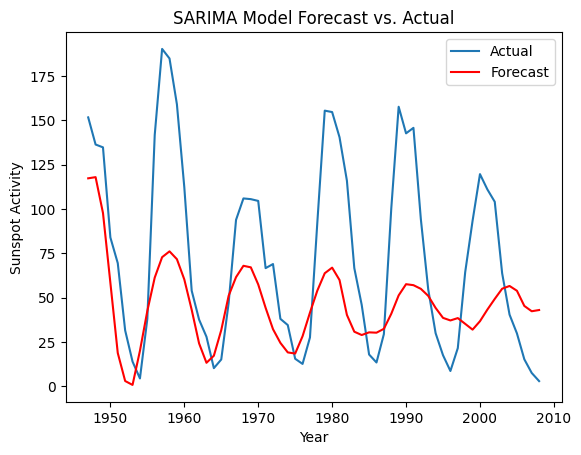

In [75]:
plt.plot(data["YEAR"][-len(test_data):], test_data, label="Actual")
plt.plot(data["YEAR"][-len(test_data):], forecast, label="Forecast", color='red')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Sunspot Activity")
plt.title("SARIMA Model Forecast vs. Actual")
plt.show()
